In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from ricci.simplicial_complex import SimplicialComplex
from ricci.ricci_flow import ricci_flow_community_detection
import matplotlib.pyplot as plt
import itertools
import networkx as nx


Dimensions and counts of simplices in the complex:
Dimension 0: 34 simplices
Dimension 1: 78 simplices
Dimension 2: 21 simplices
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Weight range after flow: min=0.965, max=0.995
 θ=0.915 → 34 communities
 θ=0.916 → 34 communities
 θ=0.917 → 34 communities
 θ=0.918 → 34 communities
 θ=0.919 → 34 communities
 θ=0.920 → 34 communities
 θ=0.921 → 34 communities
 θ=0.922 → 34 communities
 θ=0.923 → 34 communities
 θ=0.924 → 34 communities
 θ=0.925 → 34 communities
 θ=0.926 → 34 communities
 θ=0.927 → 34 communities
 θ=0.928 → 34 communities
 θ=0.929 → 34 communities
 θ=0.930 → 34 communities
 θ=0.931 → 34 communities
 θ=0.932 → 34 communities
 θ=0.933 → 34 communities
 θ=0.934 → 34 communities
 θ=0.935 → 34 communities
 θ=0.936 → 34 communities
 θ=0.937 → 34 communities
 θ=0.938 → 34 communities
 θ=0.939 → 34 communities
 θ=0.940 → 34 communities
 θ=0.941 → 34 communities
 θ=0.942 → 34 communities
 θ=0.943 → 34 communities
 

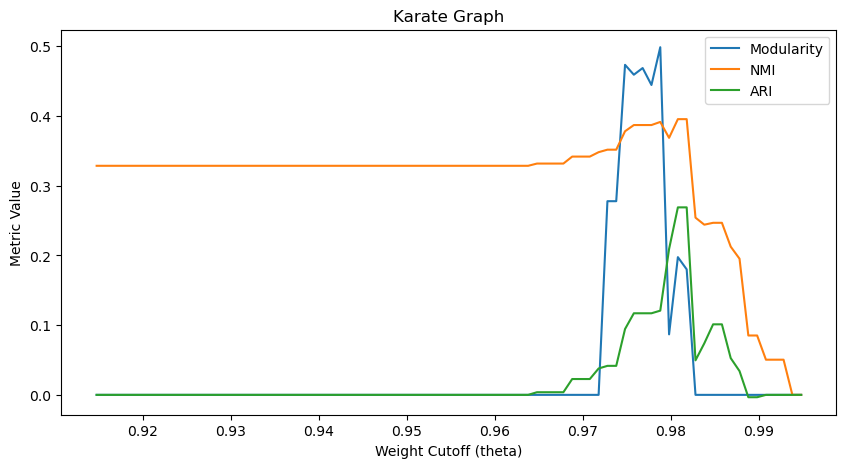

In [2]:
karate_graph = nx.karate_club_graph()

ground_truth_labels = {}
for node in sorted(karate_graph.nodes()):
    club = karate_graph.nodes[node]['club']
    label = 0 if club == 'Mr. Hi' else 1
    ground_truth_labels[node] = label

sc = SimplicialComplex()

for node in karate_graph.nodes():
    sc.add_simplex((node,))

for edge in karate_graph.edges():
    sc.add_simplex(edge)

max_clique_size = 3  
cliques = list(nx.find_cliques(karate_graph))

for clique in cliques:
    if len(clique) > 2 and len(clique) <= max_clique_size:
        for k in range(2, len(clique)):
            for simplex in itertools.combinations(clique, k+1):
                sc.add_simplex(simplex)

print("Dimensions and counts of simplices in the complex:")
for dim in sc.simplices:
    count = len(sc.simplices[dim])
    print(f"Dimension {dim}: {count} simplices")


nmi_scores, modularity_scores, theta_values, ari_scores = ricci_flow_community_detection(
                sc, T=5, delta=0.01, ground_truth=ground_truth_labels, min_theta_range=0.05)

plt.figure(figsize=(10,5))
plt.plot(theta_values, modularity_scores, label='Modularity')
plt.plot(theta_values, nmi_scores, label='NMI')
plt.plot(theta_values, ari_scores, label='ARI') 
plt.xlabel('Weight Cutoff (theta)')
plt.ylabel('Metric Value')
plt.title('Karate Graph')
plt.legend()
plt.grid(False)
plt.show()